<a href="https://colab.research.google.com/github/FGalvao77/Conhecendo-as-arvores-de-decisao-decision-trees-/blob/main/Conhecendo_as_%C3%A1rvores_de_decis%C3%A3o_(decision_trees).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conhecendo as árvores de decisão (decision trees)**

---



## **1. Introdução**

A árvore de Decisão é um tipo de algoritmo de aprendizagem de máquina supervisionado que se baseia na ideia de divisão dos dados em grupos homogêneos, podem ser utilizadas em um cenário de classificação ou regressão.

**Prós e contras das árvores de decisão:**

- possui um fácil entendimento, pois não requer nenhum conhecimento estatístico para a sua interpretação;
- aceita tanto dados categóricos quanto dados numéricos, portanto diminuindo a necessidade da limpeza de dados em comparação com outros modelos;
- é propensa a sofrer overfitting (sobreajuste), se ajustar muito aos dados de treino e não ter uma performance muito boa com os dados de teste e,
- são instáveis, pequenas alterações nos dados de treino produzem novas árvores.

**Qual é o objetivo da árvore de decisão?**

É encontrar o atributo que gera a melhor divisão dos dados, subconjunto com maior pureza. Existem algumas métricas para a definição de pureza, ou seja, qual será a métrica utilizada para decidir qual é o melhor atributo que divide os nossos dados gerando a partição mais pura. Essas métricas são:
- índice gini;
- chi-square;
- information gain e,
- redução da variância.

Conheça mais em:           
- `Medium`
 - [Árvores de Decisão](https://bit.ly/3kAguyT)
 - [Compreendendo o Índice de Gini e o ganho de informação em árvores de decisão](https://bit.ly/30knjNI)

- `Didática Tech`
 - [Como funciona o algoritmo Árvore de Decisão](https://bit.ly/3osavgF)

- `E-Disciplinas/USP`
 - [Árvores de Decisão](https://bit.ly/3Hk6HXp)

Segue abaixo um exemplo de árvore de decisão.

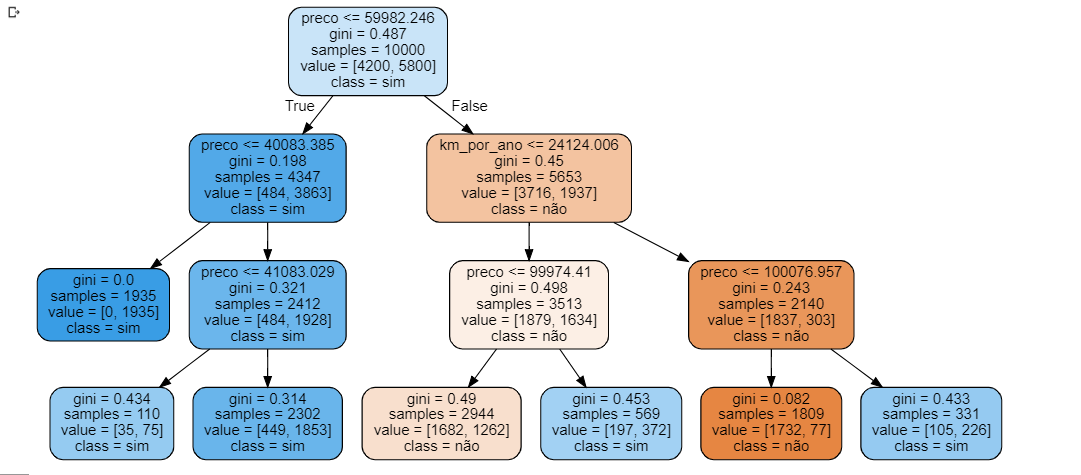

Podemos aplicar árvore de decisão para probelmas de `classificação` e para `regressão`.

Para exemplo prático, aplicarei o tutorial do [`Minerando Dados`](https://minerandodados.com.br/arvores-de-decisao-conceitos-e-aplicacoes/).

In [ ]:
# importando as bibliotecas
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# realizando o carregamento do conjunto de dados da url
url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'

# instanciando o conjunto de dados 
df_diabetes = pd.read_csv(url)

In [ ]:
# visualizando o conjunto de dados
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# informações gerais
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# instanciando as variáveis explicativas e a resposta
X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']

In [ ]:
# len(X), len(y)

In [ ]:
# visualizando as 10 primeiras linhas das variáveis "X" e "y"
X[:10], y[:10]

(   Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
 0            6      148             72  ...  33.6                     0.627   50
 1            1       85             66  ...  26.6                     0.351   31
 2            8      183             64  ...  23.3                     0.672   32
 3            1       89             66  ...  28.1                     0.167   21
 4            0      137             40  ...  43.1                     2.288   33
 5            5      116             74  ...  25.6                     0.201   30
 6            3       78             50  ...  31.0                     0.248   26
 7           10      115              0  ...  35.3                     0.134   29
 8            2      197             70  ...  30.5                     0.158   53
 9            8      125             96  ...   0.0                     0.232   54
 
 [10 rows x 8 columns], 0    1
 1    0
 2    1
 3    0
 4    1
 5    0
 6    1
 7    0
 8    1
 

In [ ]:
# realizando o particionamento dos dados - treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=123)

In [ ]:
# len(X_train), len(X_test), len(y_train), len(y_test)

In [ ]:
# visualizando a dimensão dos dados - X_train e X_test
X_train.shape, X_test.shape

((537, 8), (231, 8))

In [ ]:
# visualizando a dimensão dos dados - y_train e y_test
y_train.shape, y_test.shape

((537,), (231,))

In [ ]:
# instaciando o classificador
decTreeClas = DecisionTreeClassifier()

In [ ]:
# realizando o treinamento do classiificador com os dados de treino
model = decTreeClas.fit(X_train, y_train)

In [ ]:
# visualizando a impportância das features
model.feature_importances_

array([0.05507312, 0.26502301, 0.11321789, 0.05825945, 0.07588398,
       0.16811473, 0.11078136, 0.15364647])

In [ ]:
# realizando um for nas features
for features, importances in zip(df_diabetes.columns, 
                                 model.feature_importances_):
    print(f'{features}: {importances}')

Pregnancies: 0.05507311854029463
Glucose: 0.2650230065975755
BloodPressure: 0.113217886944743
SkinThickness: 0.058259449598049524
Insulin: 0.07588397626417416
BMI: 0.16811472575531355
DiabetesPedigreeFunction: 0.1107813632064602
Age: 0.1536464730933894


In [ ]:
# realizando as predições com os dados de teste
result = model.predict(X_test)
result  # visualizando as predições

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1])

In [ ]:
# importando a função para geração do relatório de classificação
from sklearn.metrics import classification_report

In [ ]:
# visualizando o relatório
print(classification_report(y_test, result))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       143
           1       0.61      0.59      0.60        88

    accuracy                           0.70       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.70      0.70      0.70       231



In [ ]:
# instalando as bibliotecas
!pip install ipywidgets
!pip3 install graphviz
!pip3 install pydot

In [ ]:
# importando as bibliotecas
import pydot
import graphviz

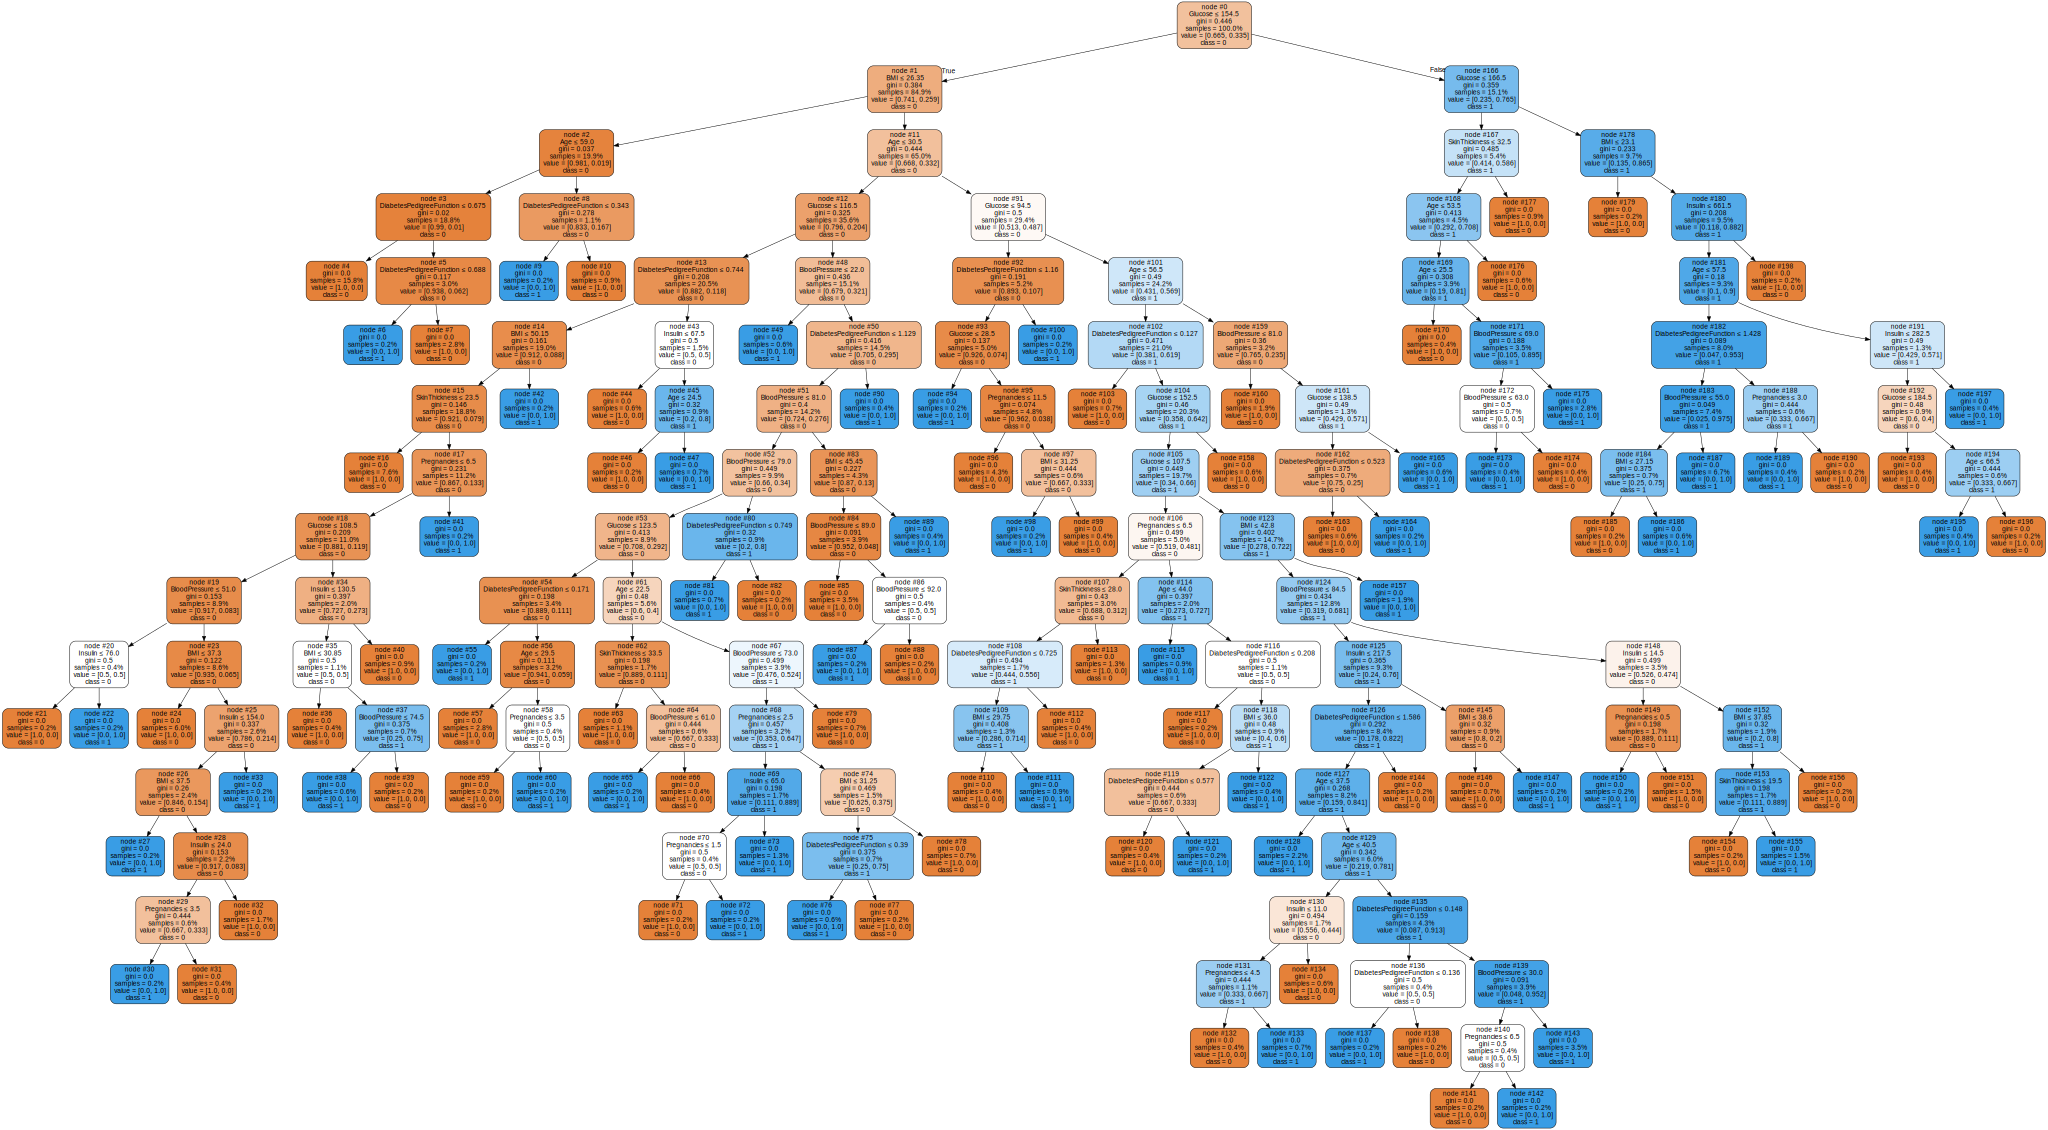

In [ ]:
# instanciando o objeto gráfico da áravore de decisão
dot_data = export_graphviz(
    model, 
    out_file=None,
    feature_names=df_diabetes.drop('Outcome', axis=1).columns,
    class_names=['0', '1'], 
    filled=True, 
    rounded=True,
    proportion=True, 
    node_ids=True, 
    rotate=False,
    label='all',
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

In [ ]:
# importando as funções
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

# instanciando as variáveis explicativas (X) e a resposta (y)
X, y = df_diabetes.drop('Outcome',axis=1), df_diabetes['Outcome']

# instanciando os rótulos
features_label = df_diabetes.drop('Outcome',
                                  axis=1).columns

# instanciando as classes
class_label = ['0','1']

# criando uma função para os parâmetros da árvore e seu estimador
'''
Segue os parâmetros:
 - critério;
 - divisão;
 - profundidade;
 - mínimo das amostras da divisão e,
 - mínimo das amostras da folha.
'''
def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeClassifier(
        random_state = 0,
        criterion = crit,
        splitter = split,
        max_depth = depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )

    # aplicando o treinamento do estimador nas variáveis X e y
    estimator.fit(X, y)
    
    # instanciando objeto gráfico
    graph = Source(export_graphviz(estimator,
                                   out_file=None,
                                   feature_names=features_label,
                                   class_names=class_label,
                                   impurity=True, 
                                   filled = True))
    display(SVG(graph.pipe(format='svg')))

    # retornando o estimador
    return estimator

# definindo os parâmetros do objeto gráfico
inter=interactive(plot_tree, 
                  crit = ['gini', 'entropy'], 
                  split = ['best', 'random'], 
                  depth=[1,2,3,4,5,10,20,30], 
                  min_samples_split=(1,5), 
                  min_samples_leaf=(1,5))

# visualizando o objeto gráfico
display(inter);

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


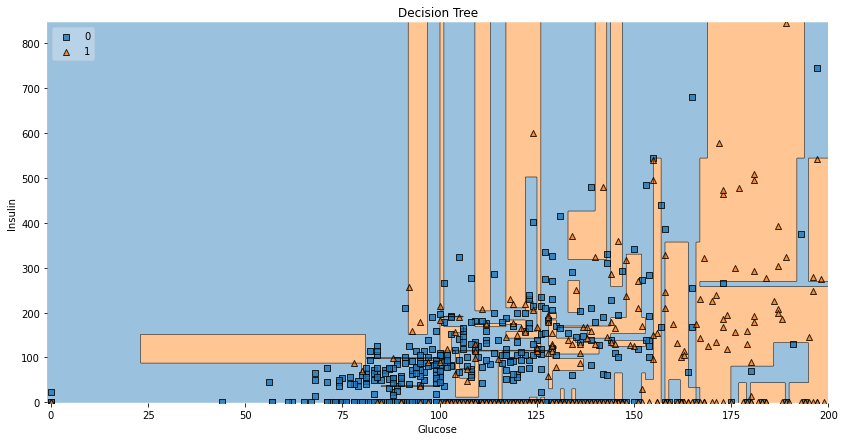

In [ ]:
# importando a função e a biblioteca para visualização gráfica
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
%matplotlib inline

# criando uma função para visualizar as fronteiras da árvore
def visualize_fronteiras(msamples_split, max_depth):
    X = df_diabetes[['Glucose','Insulin']].values
    y = df_diabetes.Outcome.values
    clf = DecisionTreeClassifier(min_samples_split=msamples_split,
                                 max_depth=max_depth)
    tree = clf.fit(X, y)

    plt.figure(figsize=(14, 7))
    plot_decision_regions(X, y, clf=tree, legend=2)

    plt.xlabel('Glucose')
    plt.ylabel('Insulin')
    plt.title('Decision Tree')
    plt.show()

# chamando a função criada anteriormente e, 
# passando como argumentos de 2 amostras no mínimo e com 30 níveis de profundidade
visualize_fronteiras(2, max_depth=30)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


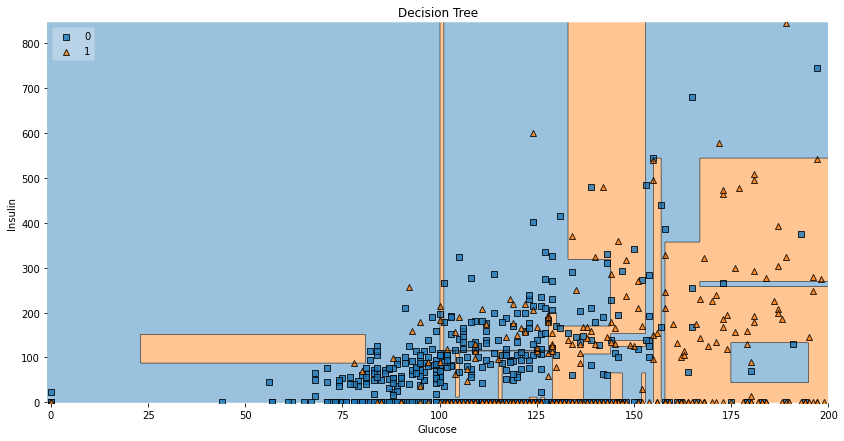

In [ ]:
# 10 amostras no mínimo e com 8 níveis de profundidade
visualize_fronteiras(10, max_depth=8)

In [ ]:
estimator = DecisionTreeClassifier(max_depth=3,min_samples_split=2,min_samples_leaf=2)
estimator.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

print("Número de nós: {}".format(n_nodes))

Número de nós: 15


In [ ]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("\nA arvore binária tem %s nós e a seguinte estrutura: \n"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snó=%s (nó folha)." % (node_depth[i] * "\t", i))
    else:
        print("%snó=%s (nó teste): vai para o nó %s se o valor do atributo %s <= %s \n se não, vai para o "
              "nó %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 df_diabetes.columns[feature[i]],
                 threshold[i],
                 children_right[i],
                 ))


A arvore binária tem 15 nós e a seguinte estrutura: 

nó=0 (nó teste): vai para o nó 1 se o valor do atributo Glucose <= 127.5 
 se não, vai para o nó 8.
	nó=1 (nó teste): vai para o nó 2 se o valor do atributo Age <= 28.5 
 se não, vai para o nó 5.
		nó=2 (nó teste): vai para o nó 3 se o valor do atributo BMI <= 45.39999961853027 
 se não, vai para o nó 4.
			nó=3 (nó folha).
			nó=4 (nó folha).
		nó=5 (nó teste): vai para o nó 6 se o valor do atributo BMI <= 26.350000381469727 
 se não, vai para o nó 7.
			nó=6 (nó folha).
			nó=7 (nó folha).
	nó=8 (nó teste): vai para o nó 9 se o valor do atributo BMI <= 29.949999809265137 
 se não, vai para o nó 12.
		nó=9 (nó teste): vai para o nó 10 se o valor do atributo Glucose <= 145.5 
 se não, vai para o nó 11.
			nó=10 (nó folha).
			nó=11 (nó folha).
		nó=12 (nó teste): vai para o nó 13 se o valor do atributo Glucose <= 157.5 
 se não, vai para o nó 14.
			nó=13 (nó folha).
			nó=14 (nó folha).


In [ ]:
def extrai_regras(sample_id):
    node_indicator = estimator.decision_path(X)

    leave_id = estimator.apply(X)

    #sample_id = sample
    node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                        node_indicator.indptr[sample_id + 1]]

    print('\nFeatures usadas para predizer a amostra %s' % (sample_id))

    for f,v in zip(df_diabetes.columns,X.iloc[sample_id].values):
        print('%s = %s'%(f,v))

    print('\n')      
    for node_id in node_index:
        if leave_id[sample_id] == node_id:
            continue

        if (X.iloc[sample_id, feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print("id do nó de decisão %s : (atributo %s com valor = %s %s %s)"
              % (node_id,
                 df_diabetes.columns[feature[node_id]],
                 X.iloc[sample_id, feature[node_id]],
                 threshold_sign,
                 threshold[node_id]))
        
    pred =estimator.predict(X.iloc[sample_id].values.reshape(1, -1))
    print(pred) 
    print("\tClasse => %s" %pred)

In [ ]:
extrai_regras(2)


Features usadas para predizer a amostra 2
Pregnancies = 8.0
Glucose = 183.0
BloodPressure = 64.0
SkinThickness = 0.0
Insulin = 0.0
BMI = 23.3
DiabetesPedigreeFunction = 0.672
Age = 32.0


id do nó de decisão 0 : (atributo Glucose com valor = 183 > 127.5)
id do nó de decisão 8 : (atributo BMI com valor = 23.3 <= 29.949999809265137)
id do nó de decisão 9 : (atributo Glucose com valor = 183 > 145.5)
[1]
	Classe => [1]


In [ ]:
extrai_regras(10)


Features usadas para predizer a amostra 10
Pregnancies = 4.0
Glucose = 110.0
BloodPressure = 92.0
SkinThickness = 0.0
Insulin = 0.0
BMI = 37.6
DiabetesPedigreeFunction = 0.191
Age = 30.0


id do nó de decisão 0 : (atributo Glucose com valor = 110 <= 127.5)
id do nó de decisão 1 : (atributo Age com valor = 30 > 28.5)
id do nó de decisão 5 : (atributo BMI com valor = 37.6 > 26.350000381469727)
[0]
	Classe => [0]
